In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
sns.set()
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 11,5

In [2]:
data = pd.read_excel('C:/Users/Shubham Ekapure/Desktop/ps_data.xlsx',index_col="To Date", parse_dates = True, dayfirst=True)

In [3]:
data.head()

,PM10,PM2.5,Wind Speed,Atmospheric temperature
To Date,,,,
2018-02-07 11:00:00,318.67,143.62,2.56,36.36
2018-02-07 12:00:00,252.25,110.79,2.18,31.26
2018-02-07 13:00:00,210.41,90.19,2.30,32.96
2018-02-07 14:00:00,133.14,28.10,2.14,33.87
2018-02-07 16:00:00,235.62,90.75,3.56,31.37


In [4]:
data.tail()

,PM10,PM2.5,Wind Speed,Atmospheric temperature
To Date,,,,
2018-03-02 17:00:00,126.71,58.98,2.30,35.97
2018-03-02 18:00:00,210.15,91.01,2.74,33.60
2018-03-02 19:00:00,395.39,190.70,3.11,30.06
2018-03-02 20:00:00,706.91,310.22,3.15,28.16
2018-03-02 21:00:00,195.51,407.70,3.42,26.91


In [5]:
#So we have hourly data for a month to analyse

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 500 entries, 2018-02-07 11:00:00 to 2018-03-02 21:00:00
Data columns (total 4 columns):
PM10                       500 non-null float64
PM2.5                      500 non-null float64
Wind Speed                 500 non-null float64
Atmospheric temperature    500 non-null float64
dtypes: float64(4)
memory usage: 19.5 KB


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 500 entries, 2018-02-07 11:00:00 to 2018-03-02 21:00:00
Data columns (total 4 columns):
PM10                       500 non-null float64
PM2.5                      500 non-null float64
Wind Speed                 500 non-null float64
Atmospheric temperature    500 non-null float64
dtypes: float64(4)
memory usage: 19.5 KB


# Format for time series is yyyy/dd/mm and hr:m:s

In [8]:
data['Day'] = data.index.weekday_name
data['Time'] = data.index.hour


In [9]:
data.head()

,PM10,PM2.5,Wind Speed,Atmospheric temperature,Day,Time
To Date,,,,,,
2018-02-07 11:00:00,318.67,143.62,2.56,36.36,Wednesday,11
2018-02-07 12:00:00,252.25,110.79,2.18,31.26,Wednesday,12
2018-02-07 13:00:00,210.41,90.19,2.30,32.96,Wednesday,13
2018-02-07 14:00:00,133.14,28.10,2.14,33.87,Wednesday,14
2018-02-07 16:00:00,235.62,90.75,3.56,31.37,Wednesday,16


## Plots

In [10]:
sns.set(rc={'figure.figsize':(11, 5)})

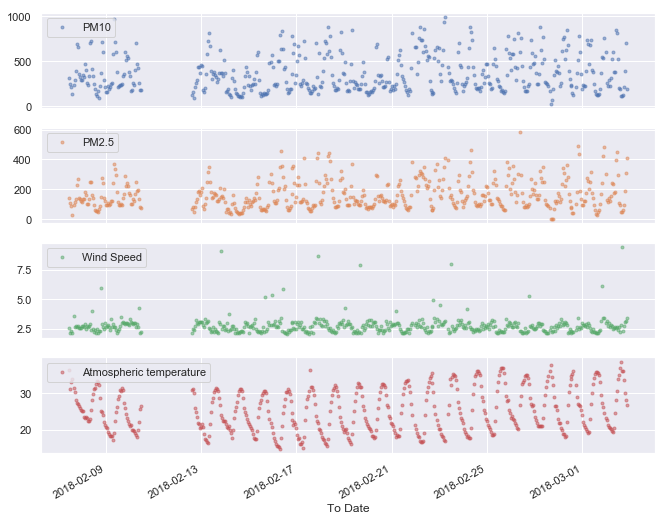

In [11]:
cols_plot = ['PM10', 'PM2.5', 'Wind Speed', 'Atmospheric temperature']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('')

### We see a gap in all the plots because the data for 11/02/18 isn't available

### Plots for entire duration

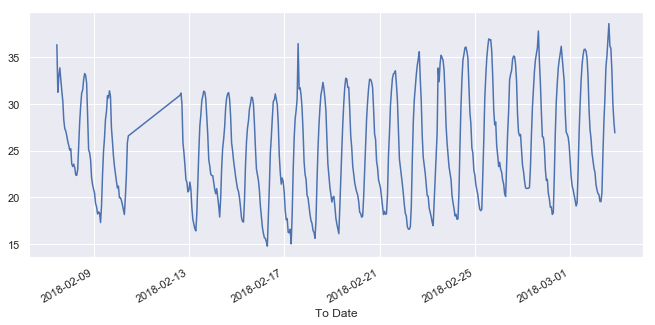

In [12]:
data['Atmospheric temperature'].plot()

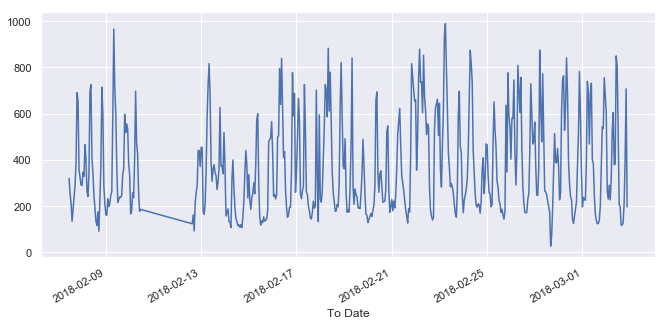

In [13]:
data['PM10'].plot()

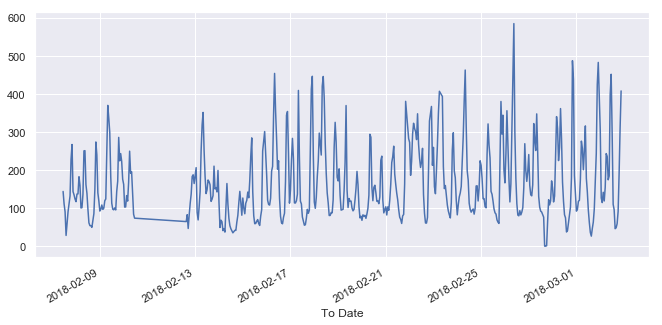

In [14]:
data["PM2.5"].plot()

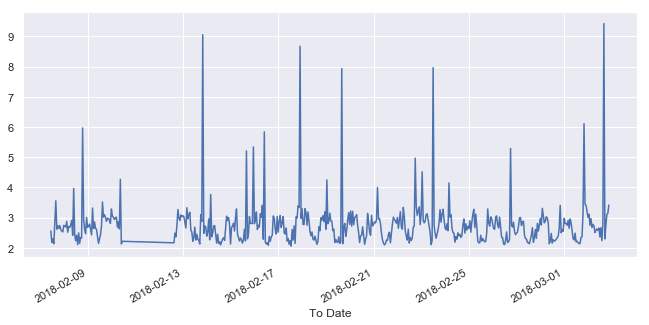

In [15]:
data['Wind Speed'].plot()

#### WEEKLY VARITAION 

































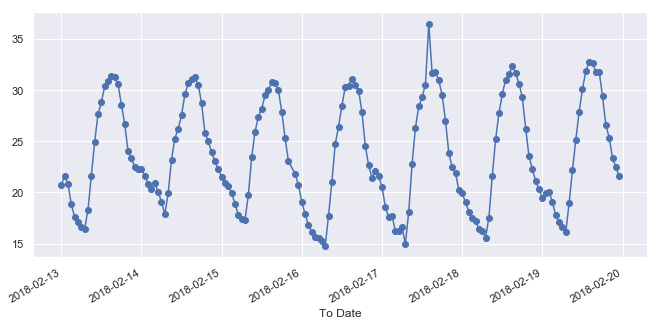

In [16]:
ax = data.loc['2018-02-13':'2018-02-19', 'Atmospheric temperature'].plot(marker='o', linestyle='-')

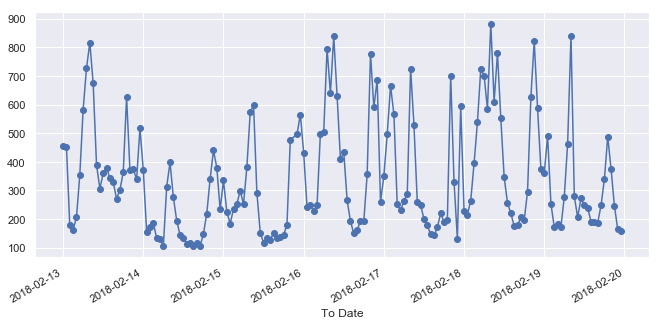

In [17]:
ax = data.loc['2018-02-13':'2018-02-19', 'PM10'].plot(marker='o', linestyle='-')

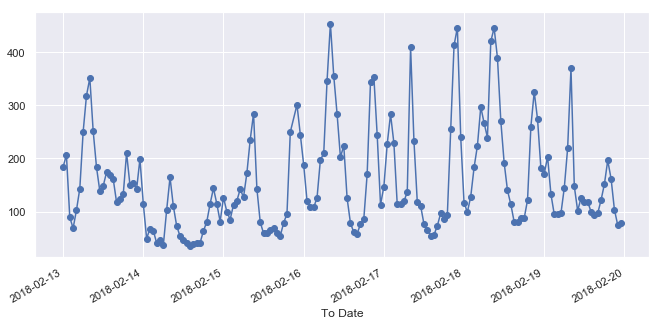

In [18]:
ax = data.loc['2018-02-13':'2018-02-19', 'PM2.5'].plot(marker='o', linestyle='-')

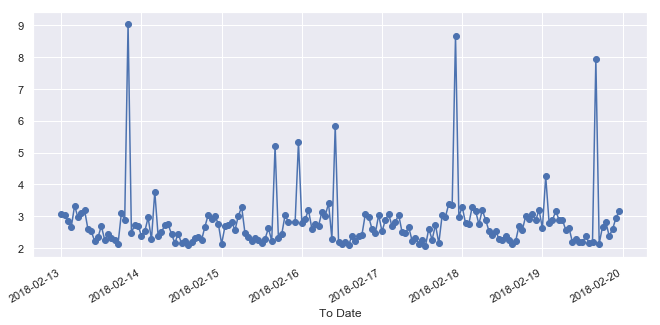

In [64]:
ax = data.loc['2018-02-13':'2018-02-19', 'Wind Speed'].plot(marker='o', linestyle='-')

### For a random day

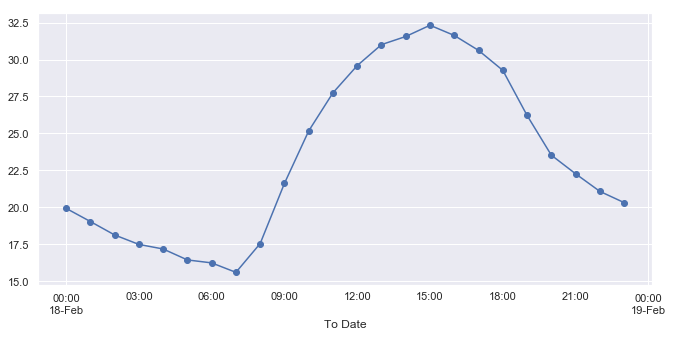

In [20]:
ax = data.loc['2018-02-18', 'Atmospheric temperature'].plot(marker='o', linestyle='-')

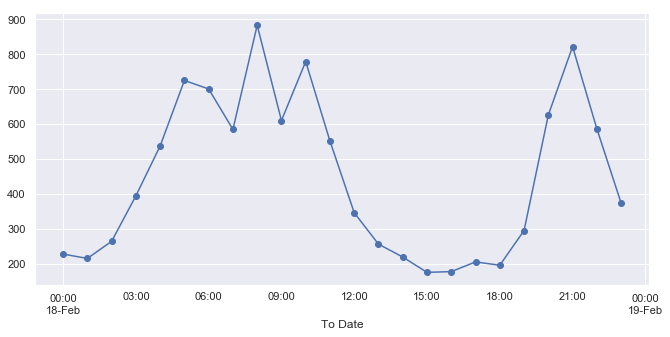

In [21]:
ax = data.loc['2018-02-18', 'PM10'].plot(marker='o', linestyle='-')

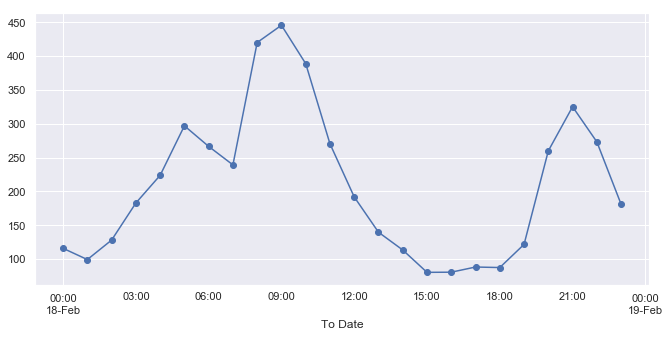

In [22]:
ax = data.loc['2018-02-18', 'PM2.5'].plot(marker='o', linestyle='-')

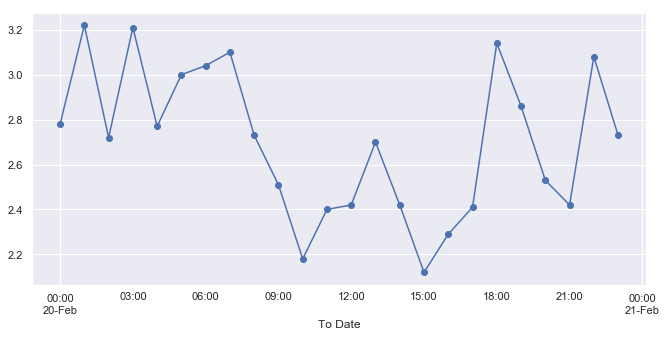

In [59]:
ax = data.loc['2018-02-20', 'Wind Speed'].plot(marker='o', linestyle='-')

**Now if we need accurate data we need to remove data before 13/02/18**


*so we will compare both the results*

In [24]:
#we will look into the rolling mean as the data moves
rolmean = data['PM10'].rolling(window=24).mean()
rolstd = data['PM10'].rolling(window=24).std()
print(rolmean,rolstd)

To Date
2018-02-07 11:00:00           NaN
2018-02-07 12:00:00           NaN
2018-02-07 13:00:00           NaN
2018-02-07 14:00:00           NaN
2018-02-07 16:00:00           NaN
2018-02-07 17:00:00           NaN
2018-02-07 18:00:00           NaN
2018-02-07 19:00:00           NaN
2018-02-07 20:00:00           NaN
2018-02-07 21:00:00           NaN
2018-02-07 22:00:00           NaN
2018-02-07 23:00:00           NaN
2018-02-08 00:00:00           NaN
2018-02-08 01:00:00           NaN
2018-02-08 02:00:00           NaN
2018-02-08 03:00:00           NaN
2018-02-08 04:00:00           NaN
2018-02-08 05:00:00           NaN
2018-02-08 06:00:00           NaN
2018-02-08 07:00:00           NaN
2018-02-08 08:00:00           NaN
2018-02-08 09:00:00           NaN
2018-02-08 10:00:00           NaN
2018-02-08 11:00:00    374.364583
2018-02-08 12:00:00    371.416667
2018-02-08 13:00:00    368.730833
2018-02-08 14:00:00    365.559583
2018-02-08 15:00:00    364.806667
2018-02-08 16:00:00    362.233333
2018-0

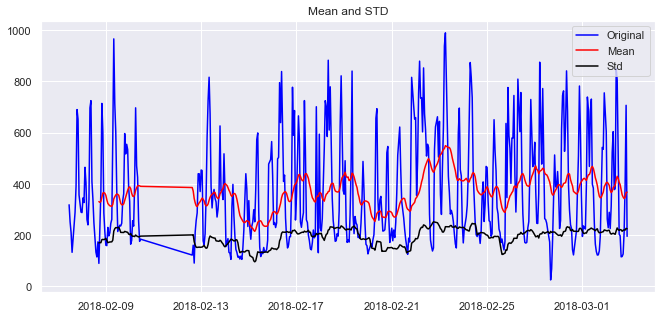

In [71]:
rolmean = data['PM10'].rolling(window=30).mean()
rolstd = data['PM10'].rolling(window=30).std()
orig = plt.plot(data['PM10'],color = 'blue',label='Original')
mean = plt.plot(rolmean,color='red',label='Mean')
std = plt.plot(rolstd,color='black',label='Std')
plt.legend(loc = 'best')
plt.title('Mean and STD')
plt.show(block=False)

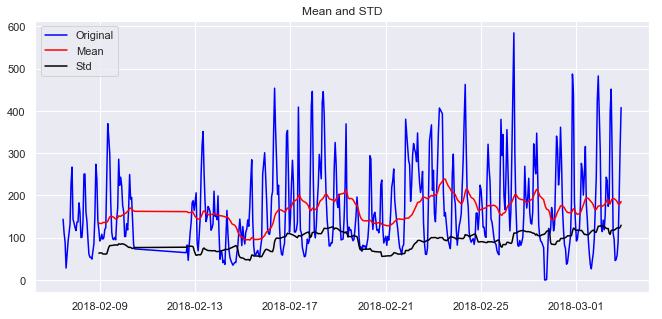

In [73]:
rolmean = data['PM2.5'].rolling(window=36).mean()
rolstd = data['PM2.5'].rolling(window=36).std()
orig = plt.plot(data['PM2.5'],color = 'blue',label='Original')
mean = plt.plot(rolmean,color='red',label='Mean')
std = plt.plot(rolstd,color='black',label='Std')
plt.legend(loc = 'best')
plt.title('Mean and STD')
plt.show(block=False)

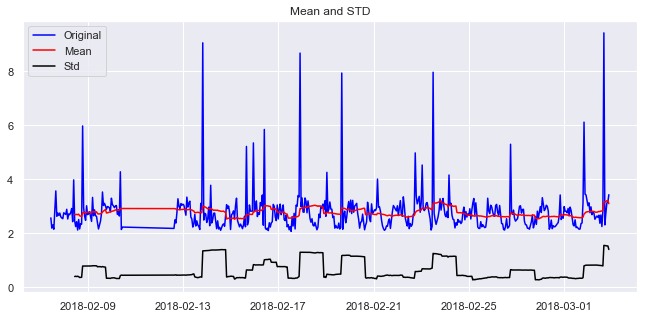

In [66]:
rolmean = data['Wind Speed'].rolling(window=24).mean()
rolstd = data['Wind Speed'].rolling(window=24).std()
orig = plt.plot(data['Wind Speed'],color = 'blue',label='Original')
mean = plt.plot(rolmean,color='red',label='Mean')
std = plt.plot(rolstd,color='black',label='Std')
plt.legend(loc = 'best')
plt.title('Mean and STD')
plt.show(block=False)

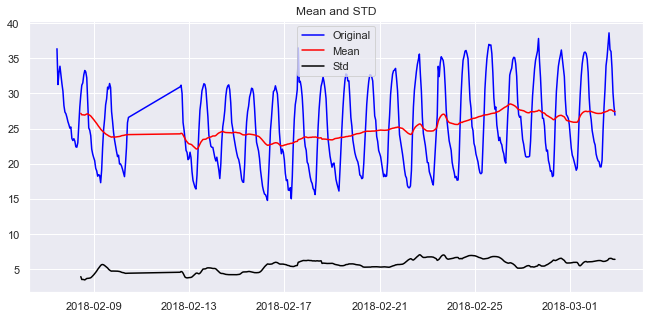

In [28]:
rolmean = data['Atmospheric temperature'].rolling(window=24).mean()
rolstd = data['Atmospheric temperature'].rolling(window=24).std()
orig = plt.plot(data['Atmospheric temperature'],color = 'blue',label='Original')
mean = plt.plot(rolmean,color='red',label='Mean')
std = plt.plot(rolstd,color='black',label='Std')
plt.legend(loc = 'best')
plt.title('Mean and STD')
plt.show(block=False)

*Clearly we have nearly constant rolling mean for **temprature** and for **wind speed** but not so for **pm10/2.5**. Hence we would need to figure out some other way for mean of PM. The data is stationary for temprature and speed*

In [29]:
def stats(timeseries):
    print('MEAN = ', timeseries.mean())
    print('MEDIAN =',timeseries.median())
    print('MODE =',timeseries.mode())
    print('STD =',timeseries.std())
    print('VARIATION COEF =',timeseries.std()/timeseries.mean())

In [76]:
stats(data["PM10"])

MEAN =  367.96643999999975
MEDIAN = 298.91999999999996
MODE = 0    136.46
1    178.28
2    252.25
3    438.92
dtype: float64
STD = 203.41033986514688
VARIATION COEF = 0.5527959013467288


In [75]:
stats(data['PM2.5'])

MEAN =  165.9021199999998
MEDIAN = 136.685
MODE = 0      0.00
1    116.10
2    200.64
dtype: float64
STD = 97.24984175693604
VARIATION COEF = 0.5861880593022931


In [32]:
stats(data['Atmospheric temperature'])

MEAN =  25.345719999999993
MEDIAN = 24.715
MODE = 0    19.06
1    22.99
2    23.36
3    30.65
dtype: float64
STD = 5.79305635095765
VARIATION COEF = 0.22856152245655878


In [33]:
stats(data['Wind Speed'])

MEAN =  2.7696400000000008
MEDIAN = 2.67
MODE = 0    2.18
1    2.62
2    2.81
3    3.01
dtype: float64
STD = 0.7789918658459204
VARIATION COEF = 0.2812610540885892


# Finding relationship between PM10 and PM2.5

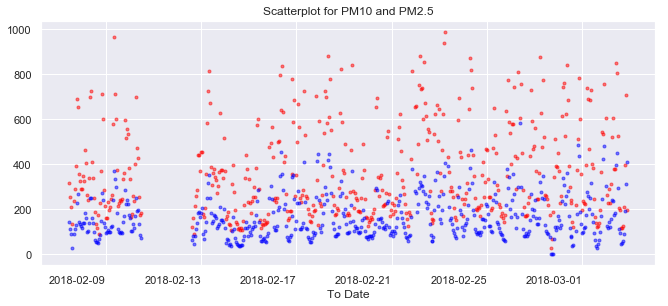

In [34]:
axes1 = data['PM10'].plot(marker='.', alpha=0.5,color = 'red',linestyle='None', figsize=(11, 5), subplots=True)
axes2 = data['PM2.5'].plot(marker='.', alpha=0.5,color = 'blue', linestyle='None', figsize=(11, 5), subplots=True)
plt.title('Scatterplot for PM10 and PM2.5')
plt.show(block=True)

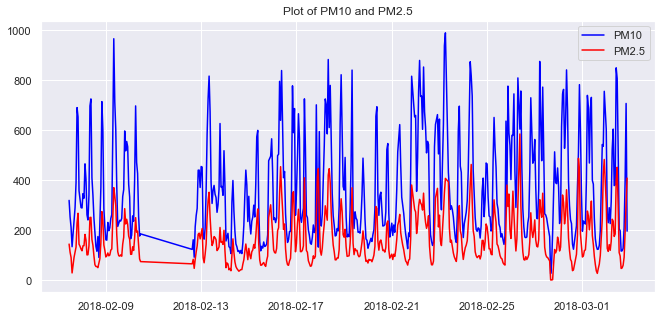

In [35]:
orig = plt.plot(data['PM10'],color = 'blue',label='PM10')
mean = plt.plot(data['PM2.5'],color='red',label='PM2.5')
plt.legend(loc = 'best')
plt.title('Plot of PM10 and PM2.5')
plt.show(block=False)

**There seems to be a pattern as both PM10 and PM2.5 rise and drop at the same time over the complete span of time. To further verify we check it for daily and weekly basis**

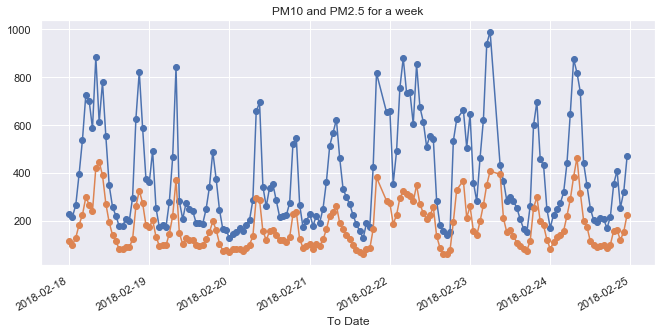

In [36]:
ax = data.loc['2018-02-18':'2018-02-24', 'PM10'].plot(marker='o', linestyle='-')
ax = data.loc['2018-02-18':'2018-02-24', 'PM2.5'].plot(marker='o', linestyle='-')
plt.title('PM10 and PM2.5 for a week')
plt.show(block=False)


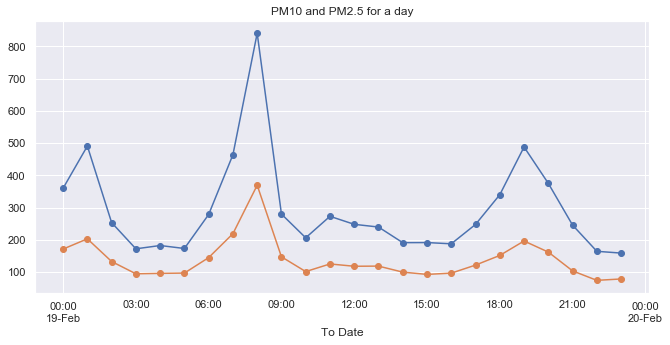

In [37]:
ax = data.loc['2018-02-19', 'PM10'].plot(marker='o', linestyle='-')
bx = data.loc['2018-02-19', 'PM2.5'].plot(marker='o', linestyle='-')
plt.title('PM10 and PM2.5 for a day')
plt.show(block=False)

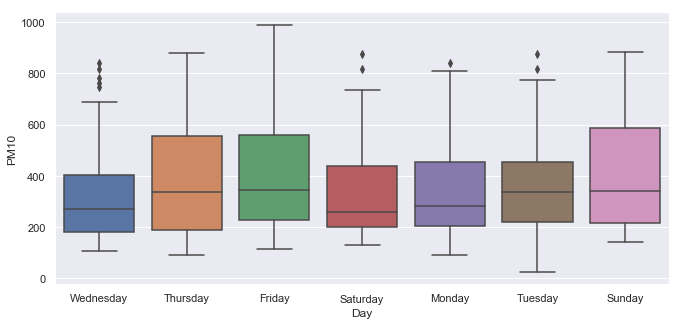

In [38]:
d = data['PM10']
sns.boxplot(data=data, x='Day', y='PM10');

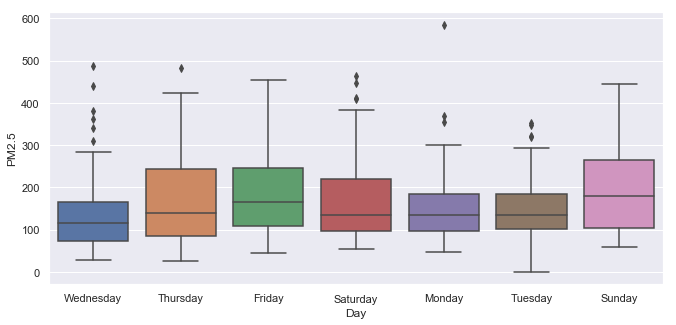

In [39]:
sns.boxplot(data=data, x='Day', y='PM2.5');

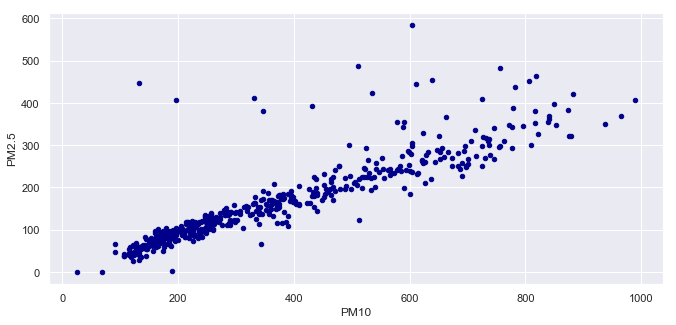

In [100]:
ax1 = data.plot.scatter(x='PM10',y='PM2.5', c='DarkBlue')

*Hence they generally show same trend*

### Finding corelation between the two

In [40]:
data.corr(method ='pearson')

,PM10,PM2.5,Wind Speed,Atmospheric temperature,Time
PM10,1.000000,0.886282,0.067655,-0.413811,-0.049748
PM2.5,0.886282,1.000000,0.142622,-0.394040,-0.030790
Wind Speed,0.067655,0.142622,1.000000,-0.190777,0.041670
Atmospheric temperature,-0.413811,-0.394040,-0.190777,1.000000,0.515480
Time,-0.049748,-0.030790,0.041670,0.515480,1.000000


AS EXPECTED THEY ARE HIGHLY CO-RELEATED.

### linear relationship for PM10 PM2.5

In [42]:
X1 = data.iloc[:, -3].values.reshape(-1,1)#Temp
X2 = data.iloc[:,-4].values.reshape(-1,1)#Wind Speed
y1 = data.iloc[:, 0].values.reshape(-1,1)#pm10
y2 = data.iloc[:,1].values.reshape(-1,1)#pm2.5

In [43]:
def regression(X,y):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)
    from sklearn.linear_model import LinearRegression
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    print(regressor.score(X_test,y_test))
    from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
    print('r2 score: %.2f' % r2_score(y_test,y_pred))
    print('mae :%.2f' % mean_absolute_error(y_test,y_pred))
    print('mse :%.2f' %mean_squared_error(y_test, y_pred))

### PM10 and Temperature

In [44]:
#pm10ntemp
regression(X1,y1)

0.18039029685832908
r2 score: 0.18
mae :146.11
mse :35190.49


### PM10 and Wind Speed

In [45]:
#pm10nwind
regression(X2,y1)

0.003713567311530941
r2 score: 0.00
mae :171.45
mse :42776.23


### Temperature is better than wind speed at measuring PM10

### PM2.5 and Temperature

In [46]:
#pm2.5vstemp
regression(X1,y2)

0.15848195192749348
r2 score: 0.16
mae :63.92
mse :7181.13


### PM2.5 and wind speed

In [47]:
#pm2.5vswind
regression(X2,y2)

0.012441594894142203
r2 score: 0.01
mae :73.37
mse :8427.38


## Full Model(Multi-Var Linear Regression)

In [48]:
#multivariable linear regression
X3 = data.iloc[:,2:4].values

### PM10

In [49]:
regression(X3,y1) #rmse for full model for PM10

0.1772425889976984
r2 score: 0.18
mae :146.80
mse :35325.64


### PM2.5

In [50]:
regression(X3,y2) #mse for PM2.5

0.16046383482115956
r2 score: 0.16
mae :63.71
mse :7164.22


### OVERALL TEMPREATURE IS BETTER FOR LINEAR RELATIONSHIP

**F-TEST** = **(SSE(reduced)-SSE(full)/change in number of parametere)/MSE(full)** The smaller the f the better model it is. This is also called as partial F-Test.

In [51]:
#For PM10
#SSE = MSE*500*1/3 by SSE = MSE*n
#First removed wind speed
print('f_statT = -0.636')
#Then removed Temperature
print('f_statW = 35')

f_statT = -0.636
f_statW = 35


*Hence the linear model with Temperature is better as f_stat is less*

In [52]:
#For PM2.5
#SSE = MSE*500*1/3 by SSE = MSE*n
#First removed wind speed
print('f_statT2 = 0.393 ')
#Then removed Temperature
print('f_statW2 = 29.38')

f_statT2 = 0.393 
f_statW2 = 29.38


*Hence the linear model with temperature is better for PM2.5 than wind speed as f_stat is less.

In [80]:
data['PM2.5'].mode()

0      0.00
1    116.10
2    200.64
dtype: float64